## Importing Required Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [49]:
xor_df = pd.read_csv(r"C:\Task\demo_data\7.xor.csv",header = None)

### Insights of Dataset

In [50]:
xor_df.head()
xor_df.shape
xor_df.info()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


(500, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


### Plotting Scatterplot to visualize the input and output

In [51]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

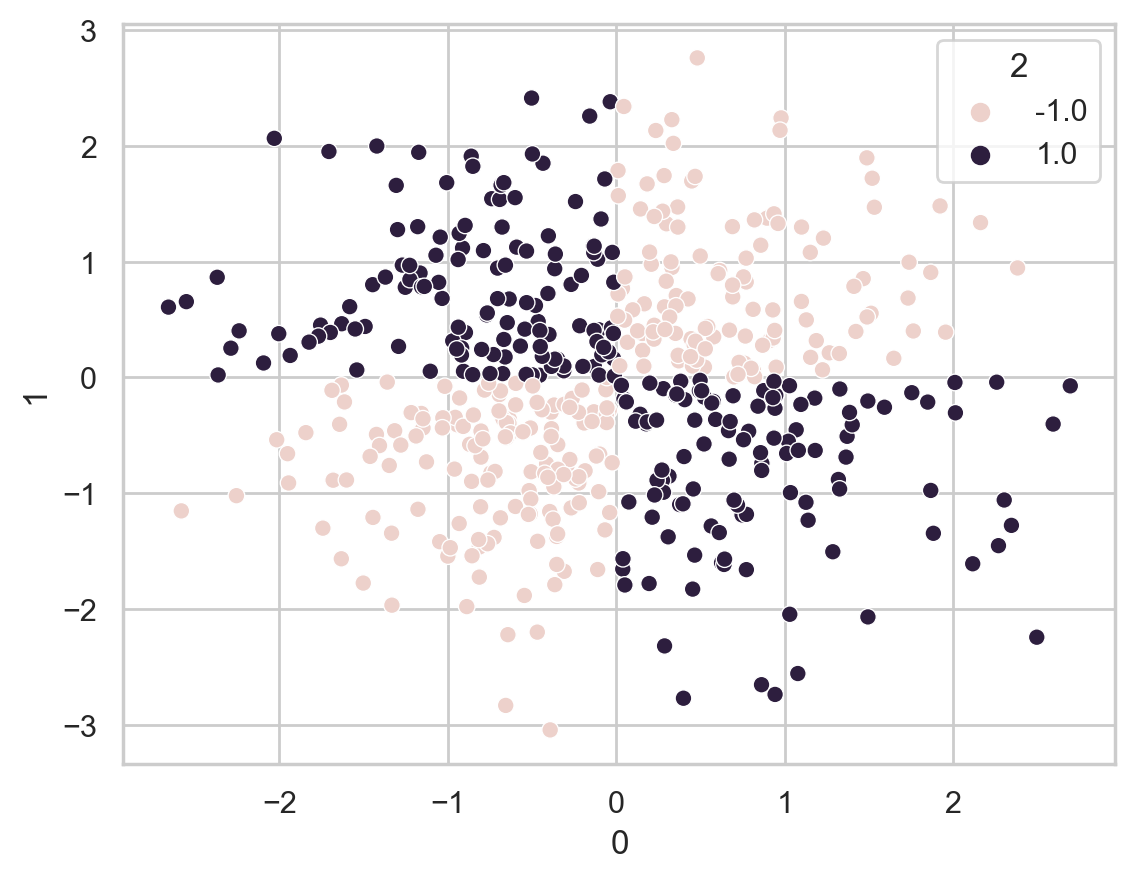

In [52]:
sns.set(style='whitegrid')
sns.scatterplot(x = xor_df[0],y = xor_df[1] ,hue = xor_df[2],data = xor_df);

### Train & test Split of the dataset

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(xor_df[[0,1]], xor_df[2], test_size = 0.2)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [57]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [58]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_normal',input_dim = 2)) # No.of Neurons
model.add(Dense(6,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 24        
                                                                 
 dense_20 (Dense)            (None, 6)                 54        
                                                                 
 dense_21 (Dense)            (None, 5)                 35        
                                                                 
 dense_22 (Dense)            (None, 2)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [60]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [61]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=300,validation_split=0.2)

Epoch 1/300


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


32/32 [==============================] - 1s 6ms/step - loss: 0.7337 - accuracy: 0.2281 - val_loss: 0.7019 - val_accuracy: 0.0500
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.0625 - val_loss: 0.6634 - val_accuracy: 0.0000e+00
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.0000e+00 - val_loss: 0.6427 - val_accuracy: 0.0000e+00
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.0000e+00 - val_loss: 0.6262 - val_accuracy: 0.0000e+00
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.0000e+00 - val_loss: 0.6090 - val_accuracy: 0.0000e+00
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.0000e+00 - val_loss: 0.5930 - val_accuracy: 0.0000e+00
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.0000e+00 - val_loss: 0.5785 - val_ac

### Evaluation of Model

In [62]:
y_pred = model.predict(X_testf) 

4/4 [==============================] - 0s 2ms/step


In [63]:
y_capf = np.where(y_pred>0.5,1,0)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.31

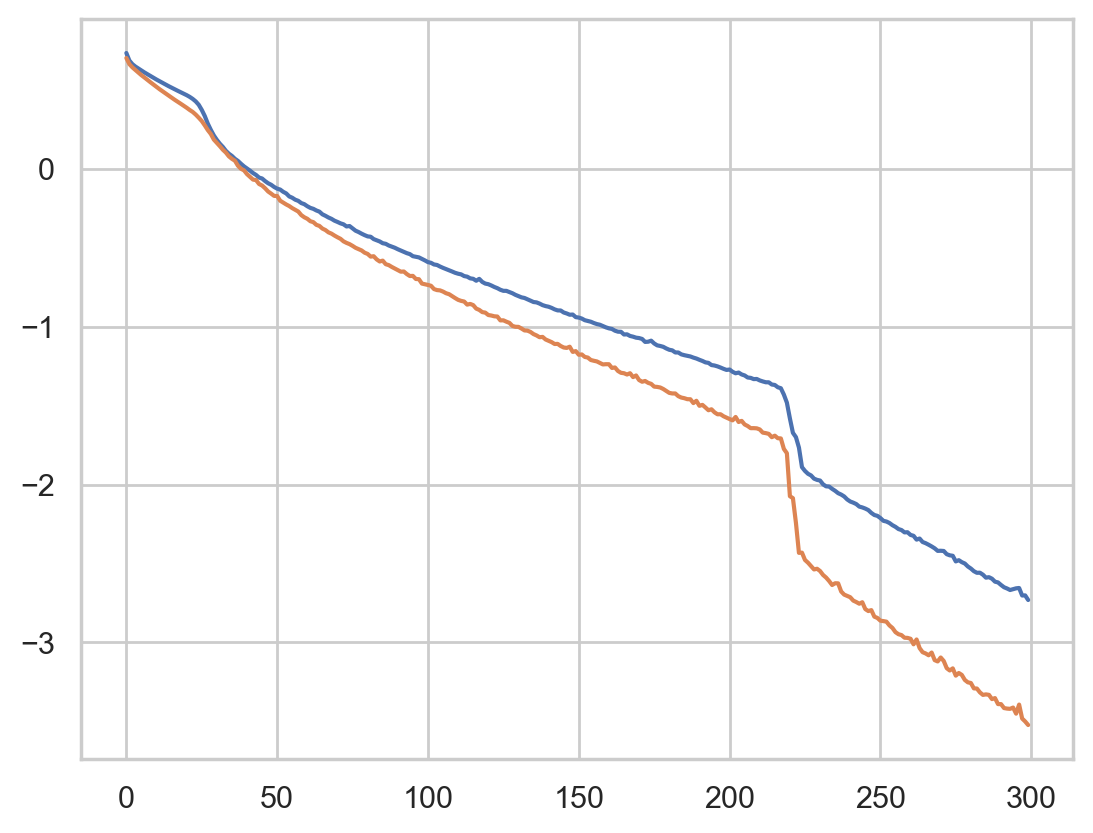

In [65]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [66]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

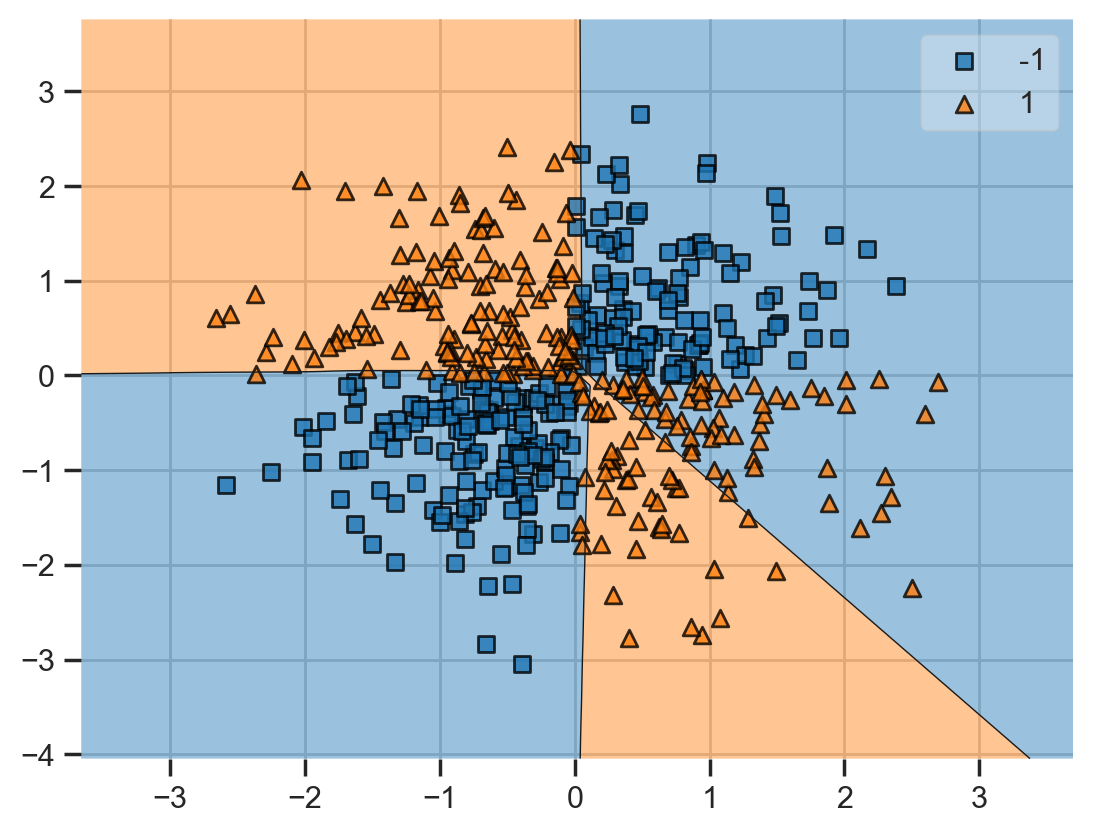

In [67]:
plot_decision_regions(xor_df[[0,1]].values, xor_df[2].values.astype(int), clf = model)

## 2nd Round

In [68]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(5,activation = 'relu',kernel_initializer = 'glorot_uniform'))
model.add(Dense(3,activation = 'relu',kernel_initializer = 'glorot_uniform'))
model.add(Dense(2,activation = 'relu',kernel_initializer = 'glorot_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 24        
                                                                 
 dense_25 (Dense)            (None, 5)                 45        
                                                                 
 dense_26 (Dense)            (None, 3)                 18        
                                                                 
 dense_27 (Dense)            (None, 2)                 8         
                                                                 
 dense_28 (Dense)            (None, 1)                 3         
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [70]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [71]:
history = model.fit(X_trainf,y_train,batch_size=12,epochs=300,validation_split=0.2)

Epoch 1/300


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


27/27 [==============================] - 1s 8ms/step - loss: 1.5170 - accuracy: 0.4219 - val_loss: 1.1904 - val_accuracy: 0.3250
Epoch 2/300
27/27 [==============================] - 0s 2ms/step - loss: 1.1985 - accuracy: 0.3406 - val_loss: 0.9833 - val_accuracy: 0.2250
Epoch 3/300
27/27 [==============================] - 0s 2ms/step - loss: 0.9870 - accuracy: 0.2781 - val_loss: 0.8412 - val_accuracy: 0.1625
Epoch 4/300
27/27 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.2625 - val_loss: 0.7390 - val_accuracy: 0.1375
Epoch 5/300
27/27 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.2344 - val_loss: 0.6519 - val_accuracy: 0.1125
Epoch 6/300
27/27 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.2250 - val_loss: 0.6090 - val_accuracy: 0.0875
Epoch 7/300
27/27 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.2125 - val_loss: 0.5868 - val_accuracy: 0.0875
Epoch 8/300
27/27 [======

### Evaluation of Model

In [72]:
y_pred = model.predict(X_testf) 

4/4 [==============================] - 0s 2ms/step


In [73]:
y_capf = np.where(y_pred>0.5,1,0)

In [74]:
accuracy_score(y_test,y_capf)

0.46

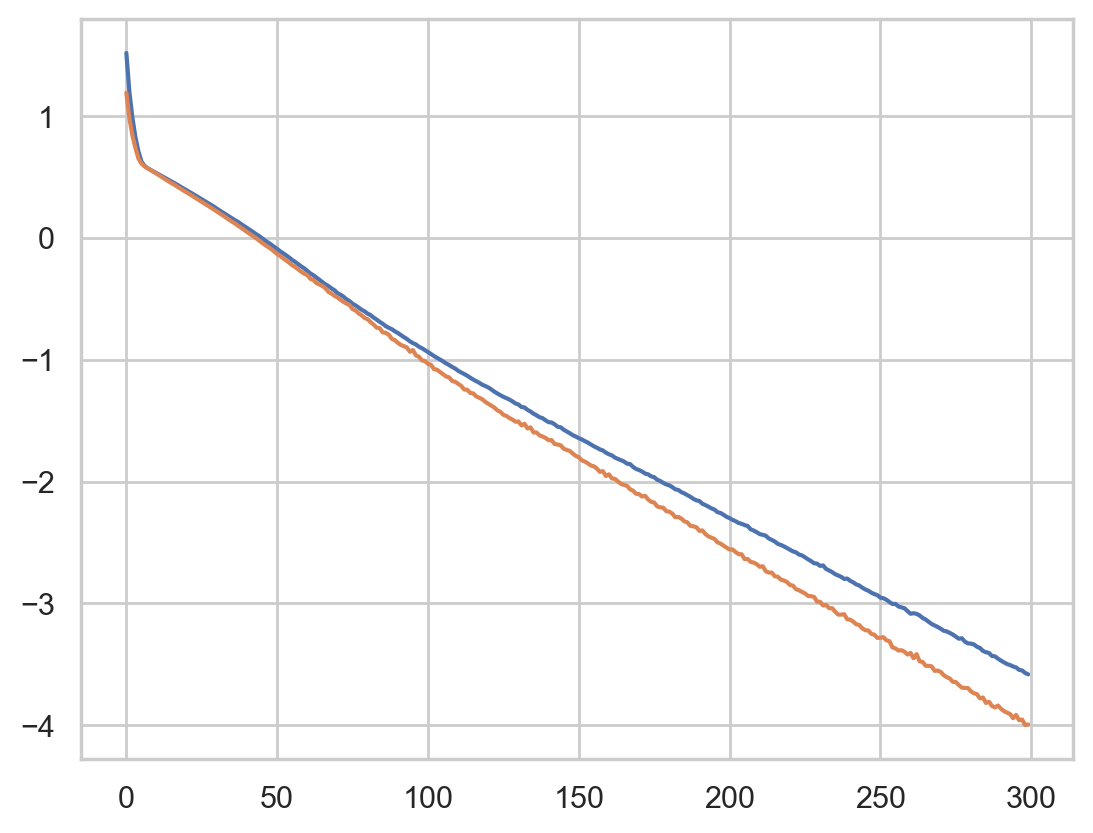

In [75]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 11s 1ms/step


<AxesSubplot: >

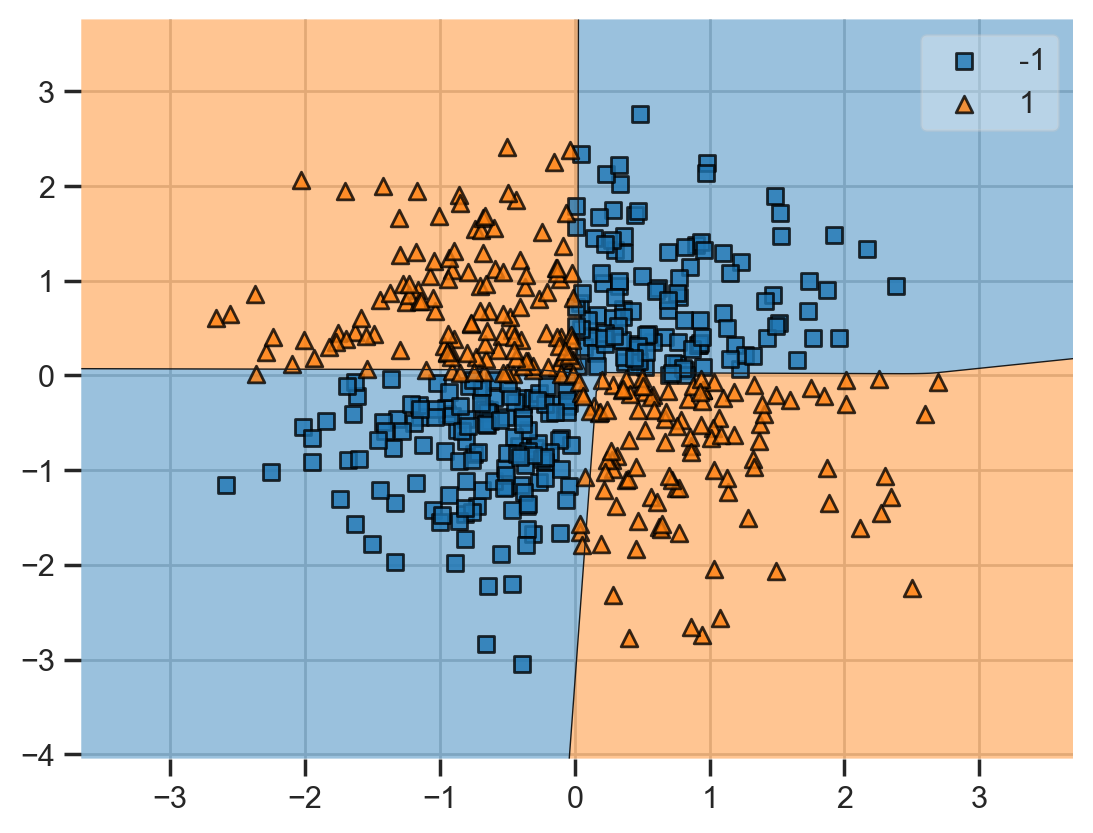

In [76]:
plot_decision_regions(xor_df[[0,1]].values, xor_df[2].values.astype(int), clf = model)